# Logistic Regression Model Notebook

```md
@author: miguelrocha
(Adapted by: Grupo 03)
```

In [17]:
# Notebook Imports
import numpy as np

from models.logistic_regression_model import LogisticRegression, classify_texts
from helpers.dataset import Dataset
from helpers.model import save_model
from helpers.metrics import confusion_matrix, balanced_accuracy, precision_recall_f1
from helpers.enums import ModelRunMode

In [18]:
# Model run mode
# Options: 
#   ModelRunMode.TRAIN.value            (Train the model)
#   ModelRunMode.CLASSIFY.value         (Classify data)
mode = ModelRunMode.TRAIN.value

In [19]:
# Parameters cell
if mode == ModelRunMode.TRAIN.value:
    # Train mode
    input_csv = "../tarefa_1/clean_input_datasets/dataset1_inputs.csv"              # CSV for training input (ID, Text)
    output_csv = "../tarefa_1/clean_output_datasets/dataset1_outputs.csv"           # CSV for training output (ID, Label)
    model_prefix = "logreg_model"                                                   # Prefix for saving the model files
    test_size = 0.3                                                                 # Proportion of the dataset to use as test data
    regularization = True                                                           # Use L2 regularization approach
    lamda = 0.5                                                                     # Lambda for L2 regularization
    alpha = 0.001                                                                   # Learning rate for gradient descent
    iters = 40000                                                                   # Iterations for gradient descent
elif mode == ModelRunMode.CLASSIFY.value:
    # Classify mode
    input_csv = "../tarefa_1/clean_input_datasets/dataset2_inputs.csv"              # CSV for training input (ID, Text)
    output_csv = "../tarefa_1/classify_output_datasets/dataset2_outputs.csv"        # CSV for predictions output
    model_prefix = "logreg_model"                                                   # Prefix for loading the model files
else:
    print("The selected option is not valid. Options: \"train\" or \"classify\"!")
    SystemExit()

Train set has 21 rows and 12 columns
Test set has 9 rows and 12 columns

Iter=0, cost=0.6922337186
Iter=1000, cost=0.5650365249
Iter=2000, cost=0.5247093269
Iter=3000, cost=0.5022734901
Iter=4000, cost=0.4875175473
Iter=5000, cost=0.4769515743
Iter=6000, cost=0.4689739592
Iter=7000, cost=0.4627281371
Iter=8000, cost=0.4577082067
Iter=9000, cost=0.4535926161
Iter=10000, cost=0.4501649672
Iter=11000, cost=0.4472729261
Iter=12000, cost=0.4448054011
Iter=13000, cost=0.4426791068
Iter=14000, cost=0.4408302387
Iter=15000, cost=0.4392090734
Iter=16000, cost=0.4377763269
Iter=17000, cost=0.4365006124
Iter=18000, cost=0.4353566156
Iter=19000, cost=0.4343237548
Iter=20000, cost=0.4333851762
Iter=21000, cost=0.4325269909
Iter=22000, cost=0.4317376863
Iter=23000, cost=0.4310076680
Iter=24000, cost=0.4303289001
Iter=25000, cost=0.4296946199
Iter=26000, cost=0.4290991106
Iter=27000, cost=0.4285375188
Iter=28000, cost=0.4280057076
Iter=29000, cost=0.4275001370
Iter=30000, cost=0.4270177665
Iter=31000

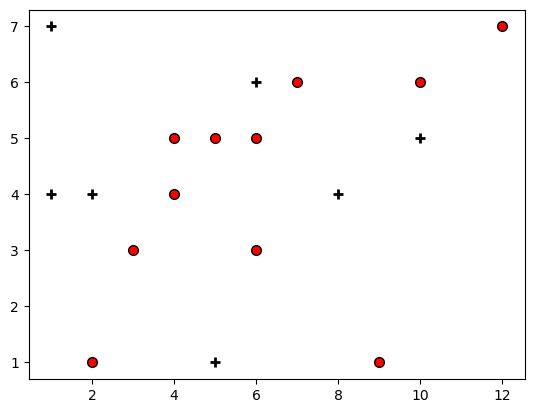

In [20]:
if mode == ModelRunMode.TRAIN.value:
    # Load Datasets
    X_train, y_train, X_test, y_test, vocab = Dataset.prepare_train_test_bow(input_csv=input_csv, output_csv=output_csv, test_size=test_size, max_vocab_size=None, min_freq=16)

    # Wrap Dataset object
    train_ds = Dataset(X=X_train, Y=y_train)
    test_ds = Dataset(X=X_test, Y=y_test)

    # Validate Train and Test dataset division
    print(f"Train set has {train_ds.nrows()} rows and {train_ds.ncols()} columns")
    print(f"Test set has {test_ds.nrows()} rows and {test_ds.ncols()} columns\n")

    # Build logistic regression model
    logmodel = LogisticRegression(train_ds, regularization=regularization, lamda=lamda)

    # Simple gradient descent
    logmodel.gradientDescent(alpha=alpha, iters=iters)

    # Save the model
    save_model(logmodel.theta, vocab, model_prefix)
    print(f"Model saved with prefix {model_prefix}")

    # Evaluate Train Accuracy
    ones_train = np.ones((train_ds.X.shape[0], 1))
    X_train_bias = np.hstack((ones_train, train_ds.X))
    train_acc = logmodel.accuracy(X_train_bias, train_ds.Y)
    print(f"Train accuracy: {train_acc:.4f}")

    # Evaluate Test Accuracy
    ones_test = np.ones((test_ds.X.shape[0], 1))
    X_test_bias = np.hstack((ones_test, test_ds.X))
    test_acc = logmodel.accuracy(X_test_bias, test_ds.Y)
    print(f"Test accuracy: {test_acc:.4f}")

    preds = logmodel.predictMany(X_test_bias)
    TP, FP, TN, FN = confusion_matrix(y_test, preds)
    prec, rec, f1 = precision_recall_f1(y_test, preds)
    bal_acc = balanced_accuracy(y_test, preds)

    print("Confusion Matrix: TP={}, FP={}, TN={}, FN={}".format(TP, FP, TN, FN))
    print("Precision = {:.4f}, Recall = {:.4f}, F1 = {:.4f}".format(prec, rec, f1))
    print("Balanced Accuracy = {:.4f}".format(bal_acc))
    logmodel.plotModel()

if mode == ModelRunMode.CLASSIFY.value:
    classify_texts(input_csv, output_csv, model_prefix=model_prefix)